## AIR QUALITY ANALYSIS

# OBTAIN

In [1]:
'''
Here 
1. We get the datasets
2. Establish the datasources. .
Data source :https://www.kaggle.com/datasets/azminetoushikwasi/aqi-air-quality-index-scheduled-daily-update?resource=download
'''

'\nHere \n1. We get the datasets\n2. Establish the datasources. .\nData source :https://www.kaggle.com/datasets/azminetoushikwasi/aqi-air-quality-index-scheduled-daily-update?resource=download\n'

In [2]:
# import the required libraries
# have the libraries on their own cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date

In [3]:
#Documents/UADSL/PYTHON/DATA/data_date.csv

In [4]:

# read the dataset
#data_source = ".\data"
air_quality = pd.read_csv("C:\\Users\\Lenovo\\OneDrive\\Documents\\UADSL\\PYTHON\\DATA\\data_date.csv")
air_quality.head()

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63


In [5]:
air_quality.tail()1

SyntaxError: invalid syntax (737119005.py, line 1)

# SCRUB

In [6]:
'''
Is the data:1 1
        Complete/assess gaps in the data 1
        Has missing values
        Consistency
        Data Integrity/Uniformity
        Repeating Values
'''

'\nIs the data:1 1\n        Complete/assess gaps in the data 1\n        Has missing values\n        Consistency\n        Data Integrity/Uniformity\n        Repeating Values\n'

In [7]:
air_quality.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15690 entries, 0 to 15689
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       15690 non-null  object
 1   Country    15690 non-null  object
 2   Status     15690 non-null  object
 3   AQI Value  15690 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 490.4+ KB


In [8]:
air_quality.describe()

,AQI Value
count,15690.000000
mean,61.640599
std,48.448891
min,1.000000
25%,29.000000
50%,52.000000
75%,81.000000
max,963.000000


In [9]:
'''
- There are no missing values
- The column data types are good but:
    The date column should be transformed to date-type object
    '''

'\n- There are no missing values\n- The column data types are good but:\n    The date column should be transformed to date-type object\n    '

In [31]:
# transform the date column from a string to an date
air_quality["Date"] = pd.to_datetime(air_quality["Date"])

In [32]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15690 entries, 0 to 15689
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       15690 non-null  datetime64[ns]
 1   Country    15690 non-null  object        
 2   Status     15690 non-null  object        
 3   AQI Value  15690 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 490.4+ KB


In [33]:
# The original dataset
air_quality.shape

(15690, 4)

In [34]:
# Checking the sum of the duplicates
# The .duplicated() returns a boolean series object indicating whether each row is a duplicate
# All duplicate rows will be set to true / 1. 
air_quality_duplicates = air_quality.duplicated(keep=False)
air_quality_duplicates.sum()

588

In [35]:
# Extract the duplicated values from the main data frame
air_quality_duplicated_values = air_quality[air_quality_duplicates]
air_quality_duplicated_values 

,Date,Country,Status,AQI Value
1,2022-07-21,Algeria,Moderate,65
10,2022-07-21,Bangladesh,Unhealthy for Sensitive Groups,141
18,2022-07-21,Brunei,Good,15
21,2022-07-21,Cambodia,Good,15
34,2022-07-21,Denmark,Good,36
...,...,...,...,...
13247,2024-06-06,Uzbekistan,Good,21
13248,2024-06-06,Vatican,Good,25
13249,2024-06-06,Venezuela,Good,10
13250,2024-06-06,Vietnam,Moderate,63


In [36]:
# The dataset that has the duplicates been removed
air_quality_no_duplicates = air_quality.drop_duplicates()
air_quality_no_duplicates.shape

(15390, 4)

In [37]:
# Generate a clean csv of the dataframe
air_quality_no_duplicates.to_csv("data\\good_air_quality.csv", index = False, header = True)

In [38]:
# Generate a duplicated csv
air_quality_duplicated_values.to_csv("data\\bad_air_quality_csv", index = False, header = True)

In [54]:
# transform the date column from a string to an date
good_air_quality["Date"] = pd.to_datetime(good_air_quality["Date"])

In [39]:
good_air_quality = pd.read_csv("C:\\Users\\Lenovo\\OneDrive\\Documents\\UADSL\\PYTHON\\DATA\\good_air_quality.xls")
good_air_quality

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63
...,...,...,...,...
15385,2024-10-17,United States of America,Unhealthy for Sensitive Groups,106
15386,2024-10-17,Uzbekistan,Unhealthy,195
15387,2024-10-17,Vatican,Good,42
15388,2024-10-17,Venezuela,Moderate,51


In [42]:
good_air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15390 entries, 0 to 15389
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       15390 non-null  datetime64[ns]
 1   Country    15390 non-null  object        
 2   Status     15390 non-null  object        
 3   AQI Value  15390 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 481.1+ KB


In [52]:
good_air_quality["Date"].unique()

<DatetimeArray>
['2022-07-21 00:00:00', '2022-07-22 00:00:00', '2022-07-23 00:00:00',
 '2022-07-24 00:00:00', '2022-07-25 00:00:00', '2022-07-26 00:00:00',
 '2022-07-27 00:00:00', '2022-07-28 00:00:00', '2022-07-29 00:00:00',
 '2022-07-30 00:00:00',
 ...
 '2024-08-15 00:00:00', '2024-08-22 00:00:00', '2024-08-29 00:00:00',
 '2024-09-05 00:00:00', '2024-09-12 00:00:00', '2024-09-19 00:00:00',
 '2024-09-26 00:00:00', '2024-10-03 00:00:00', '2024-10-10 00:00:00',
 '2024-10-17 00:00:00']
Length: 105, dtype: datetime64[ns]

In [55]:
# Filter the data for the year 2022
good_air_quality_2022 = good_air_quality[good_air_quality['Date'].dt.year == 2022]

# Display the first few rows of the new DataFrame
good_air_quality_2022.head()

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63


In [57]:
len(good_air_quality_2022)

9827

## EXPLORATION

**SUMMARY STATISTICS**

In [58]:
# using groupby to categorize the countries by their air quality status in 2022
aqi_by_status = good_air_quality_2022.groupby('Status')['AQI Value'].describe()
aqi_by_status

,count,mean,std,min,25%,50%,75%,max
Status,,,,,,,,
Good,4803.0,27.811160,12.887442,1.0,18.00,28.0,38.00,50.0
Hazardous,22.0,414.318182,159.628553,305.0,326.25,365.5,405.00,868.0
Moderate,3604.0,71.649001,13.631861,51.0,60.00,70.0,83.00,100.0
Unhealthy,422.0,167.421801,12.317930,151.0,157.00,163.0,180.00,200.0
Unhealthy for Sensitive Groups,926.0,121.480562,14.618875,101.0,108.00,118.0,134.00,150.0
Very Unhealthy,50.0,242.060000,25.616011,204.0,220.00,238.0,258.75,289.0


In [59]:
len(good_air_quality_2022["Country"].unique())

142

In [60]:
good_air_quality_2022.describe()

,Date,AQI Value
count,9827,9827.000000
mean,2022-08-20 00:39:51.452121600,60.665615
min,2022-07-21 00:00:00,1.000000
25%,2022-08-03 00:00:00,28.500000
50%,2022-08-20 00:00:00,52.000000
75%,2022-09-06 00:00:00,82.000000
max,2022-09-22 00:00:00,868.000000
std,NaN,45.727379


**SPREAD OF DATA**

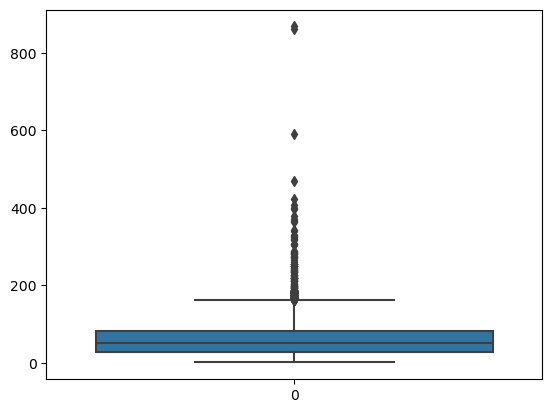

In [61]:
# Checking for outliers in the air quality data
# Drawing a box plot
plt.figure()
sns.boxplot(good_air_quality_2022["AQI Value"])
plt.show()

**DISTRIBUTION OF MAJOR VARIABLES**

In [63]:
# Creating a variable called monthly_aqi-trend_2022 
# set_index makes the date as the main column in the dataframe called monthly_aqi_trend_2022
# .mean() takes the average of the dataframe column
monthly_aqi_trend_2022 = good_air_quality_2022.set_index('Date')['AQI Value'].mean()

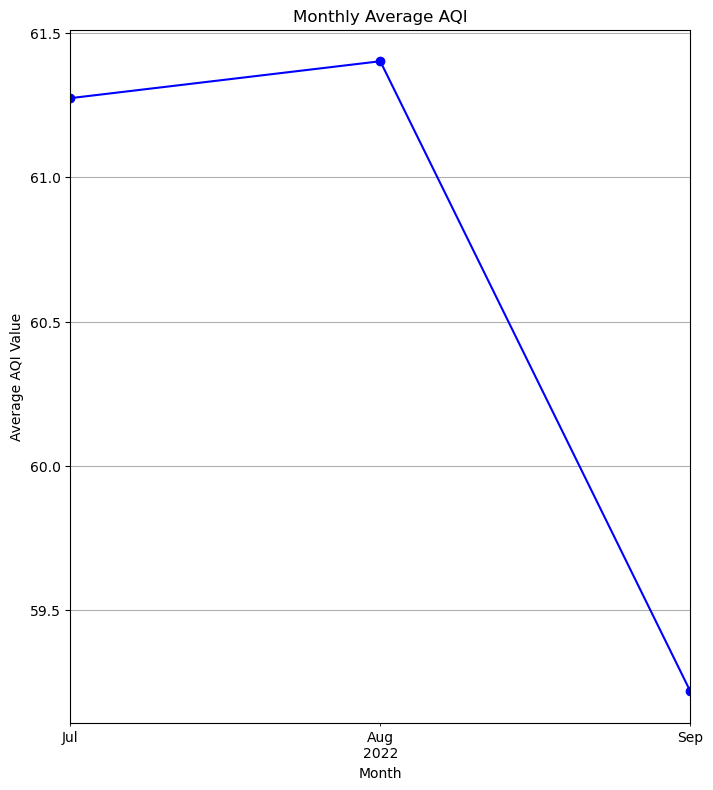

In [70]:
# A visualization of the trends in AQI per month over the years
# A plot of the monthly AQI trend
plt.figure(figsize=(8,9))
monthly_aqi_trend_2022.plot(title="Monthly Average AQI", color="b", marker='o')
plt.xlabel("Month")
plt.ylabel("Average AQI Value")
plt.grid(True)
plt.show()


In [ ]:
In August 2022, there was a spike in air quality index.
This may be attributed to various factors that were happening during 2022 August

C:\Users\Lenovo\anaconda3\ANACONDA30\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


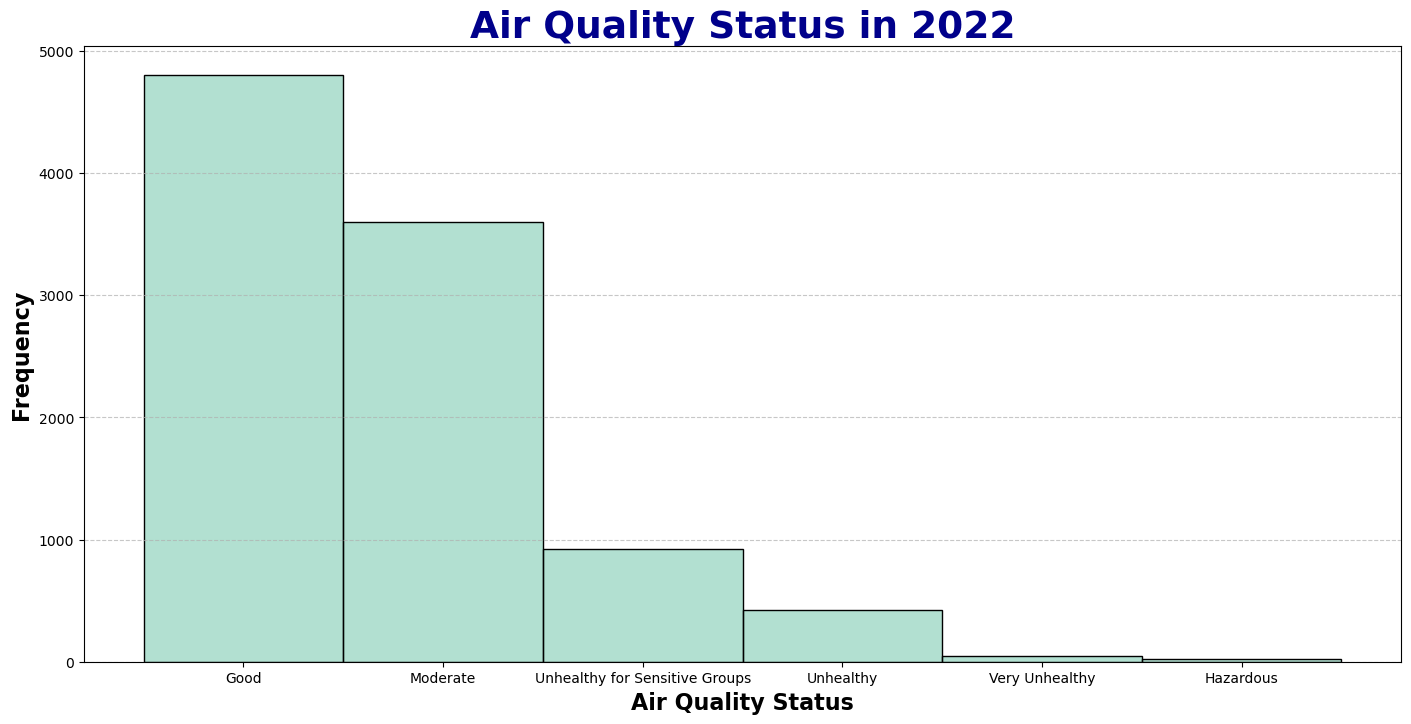

In [92]:
# A plot of 2022 data according to status
plt.figure(figsize=(17, 8))
palette = sns.color_palette("Set2")
sns.histplot(good_air_quality_2022['Status'],color=palette[0],bins=30,alpha=0.5)               
plt.title('Air Quality Status in 2022', fontsize=27, fontweight='bold', color='darkblue')
plt.xlabel('Air Quality Status', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=16, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [102]:
top_10_countries = good_air_quality.sort_values(by='AQI Value', ascending=False).head(10)
top_10_countries["Country"].unique()

array(['China', 'United Arab Emirates', 'Iraq', 'India', 'Uzbekistan',
       'Germany'], dtype=object)

In [99]:
bottom_10_countries = good_air_quality.sort_values(by='AQI Value', ascending=True).head(10)
bottom_10_countries

,Date,Country,Status,AQI Value
6126,2022-08-28,Grenada,Good,1
4877,2022-08-20,Guam,Good,1
949,2022-07-24,Guam,Good,1
7503,2022-09-07,Cayman Islands,Good,1
7524,2022-09-07,Gambia,Good,1
7642,2022-09-08,Cayman Islands,Good,1
687,2022-07-23,Guam,Good,1
7671,2022-09-08,Guam,Good,1
4425,2022-08-17,Cayman Islands,Good,1
7810,2022-09-09,Guam,Good,1


## CONCLUSION

In [ ]:
The countries with the worst air quality in 2022 are: 
        China
        United Arab Emirates
        Iraq
        India
        Uzbekistan
        Germany
In August 2022, there was a spike in air quality index.
This may be attributed to various factors that were happening during 2022 August

The air quality became better in 2022 September after a reduction in the spike. 